<a href="https://colab.research.google.com/github/norahalamri96/Norah.Alamri/blob/main/books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import nltk as nltk

**Reading the *Dataset***

In [ ]:
df = pd.read_csv ("/content/books_summary.csv")
df.head(10)

,Unnamed: 0,book_name,summaries,categories
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science
3,3,Brave New World,presents a futuristic society engineered perf...,science
4,4,1984,is the story of a man questioning the system ...,science
5,5,Stolen Focus,explains why our attention spans have been dw...,science
6,6,The Life-Changing Science of Detecting Bullshit,teaches its readers how to avoid falling for ...,science
7,7,Dopamine Nation,talks about the importance of living a balance...,science
8,8,The Art of Statistics,is a non-technical book that shows how statis...,science
9,9,No Self No Problem,is a provocative read about the implications ...,science


# **Exploring the Dataset**

In [ ]:
df.shape

(5201, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5201 entries, 0 to 5200
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5201 non-null   int64 
 1   book_name   5201 non-null   object
 2   summaries   5194 non-null   object
 3   categories  5201 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.7+ KB


In [ ]:
df.describe()

,Unnamed: 0
count,5201.000000
mean,2620.537781
std,1513.823544
min,0.000000
25%,1312.000000
50%,2617.000000
75%,3931.000000
max,5244.000000


In [ ]:
df.book_name.value_counts()

Brave New World             21
Stolen Focus                18
The Infinite Game           18
The Little Prince           16
The Daily Laws              15
                            ..
Lead Yourself First          1
The Authoritarian Moment     1
The Social Contract          1
On The Shortness Of Life     1
 The Book                    1
Name: book_name, Length: 1231, dtype: int64

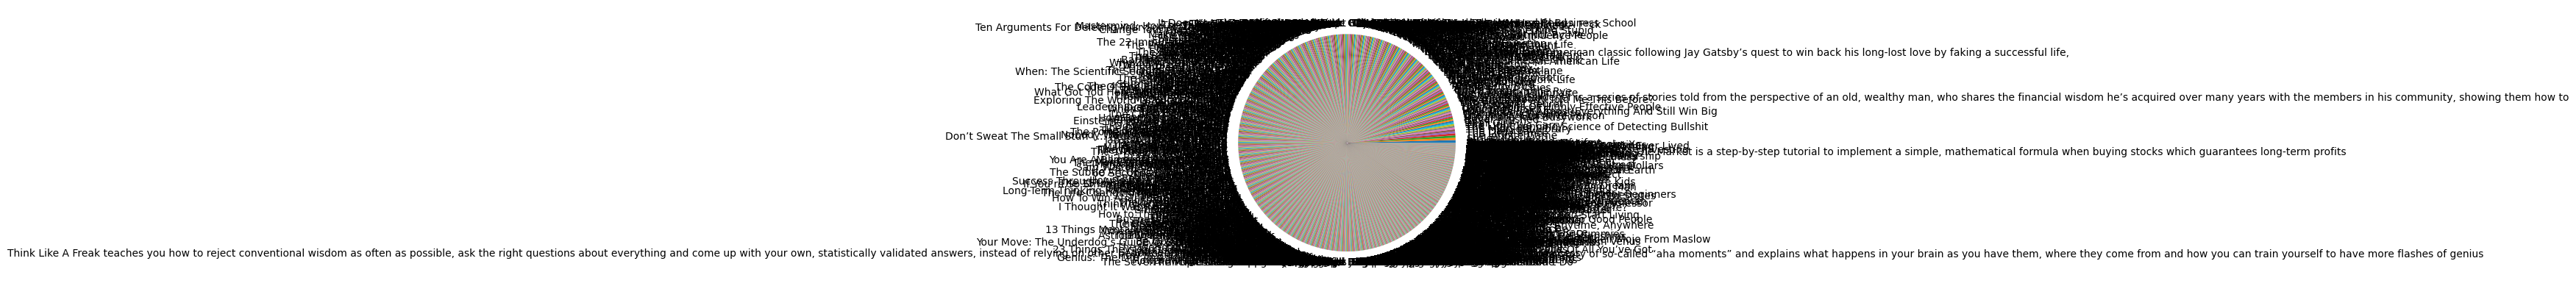

In [ ]:
df.book_name.value_counts(normalize=True).plot.pie()
plt.show()

# **Removing Punctuation**

**Removing Punctuation for the Book Name**

In [ ]:
import string #importing the needed library
string.punctuation

def remove_punct(text): #defining a function for removing punctuation
    text_nonpunct = "".join([char for char in text if char not in string.punctuation]) #this line checks punctuation characters then removes it by join()
    return text_nonpunct #returns the non punctuation text

df['book_name_nonpunct'] = df['book_name'].apply(lambda x: remove_punct(x.lower())) #adding a new column which the function is applied to
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world
4,4,1984,is the story of a man questioning the system ...,science,1984


**Removing Punctuation for the Book Summary**

In [ ]:
def remove_punct(text): #defining a function for removing punctuation
    if isinstance(text, str):  # Check if the value is a string
        text_nonpunct = "".join([char for char in text if char not in string.punctuation])
        return text_nonpunct.lower()

df['summaries_nonpunct'] = df['summaries'].apply(lambda x: remove_punct(x))
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...


# **Tokenization**

**Tokenize Book name**

In [ ]:
import nltk #importing the needed library
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize(text): #defining a function for tokenization
     tokens = word_tokenize(text) #this line tokenizes the text string
     return tokens
df['book_name_tokenized']=df['book_name_nonpunct'].apply(lambda x:tokenize(x)) #adding a new column which the function is applied to
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]"
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]"
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]"
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]"
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984]


**Tokenize Book summary**

In [ ]:
def tokenize(text):
    if isinstance(text, str):  # Check if the value is a string
        tokens = word_tokenize(text)
        return tokens

df['summaries_tokenized'] = df['summaries_nonpunct'].apply(lambda x: tokenize(x))
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]","[is, a, selfassessment, guide, and, howtolive,..."
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]","[is, a, collection, of, a, clinical, psycholog..."
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]","[tells, the, story, of, nora, a, depressed, wo..."
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,..."
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,..."


# **Stop Words**

In [ ]:
nltk.download('stopwords') #importing needed libraries
import nltk
from nltk.corpus import stopwords

stopwords_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Removing stop words from book name**

In [ ]:
def remove_stopwords(tokenized_list): #define a function named remove_stopwords

  text = [word for word in tokenized_list if word not in stopwords_english] #create a list called text, which contains only the words from tokenized_list that are not in stopwords_english

  return text

df['book_name_nostop'] = df['book_name_tokenized'].apply(lambda x: remove_stopwords(x)) #adding a new column which the function is applied to
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]","[is, a, selfassessment, guide, and, howtolive,...","[highly, sensitive, person]"
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]","[is, a, collection, of, a, clinical, psycholog...","[nobody, told]"
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]","[tells, the, story, of, nora, a, depressed, wo...","[midnight, library]"
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,...","[brave, new, world]"
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984]


**Removing stop words from book summary**

In [ ]:
def remove_stopwords(tokenized_list):
    if tokenized_list is None:
        return []  # Return an empty list if tokenized_list is None

    text = [word for word in tokenized_list if word not in stopwords_english]
    return text

df['summaries_nostop'] = df['summaries_tokenized'].apply(lambda x: remove_stopwords(x)) #adding a new column which the function is applied to
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop,summaries_nostop
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]","[is, a, selfassessment, guide, and, howtolive,...","[highly, sensitive, person]","[selfassessment, guide, howtolive, template, p..."
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]","[is, a, collection, of, a, clinical, psycholog...","[nobody, told]","[collection, clinical, psychologist, ’, best, ..."
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]","[tells, the, story, of, nora, a, depressed, wo...","[midnight, library]","[tells, story, nora, depressed, woman, 30s, da..."
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,...","[brave, new, world]","[presents, futuristic, society, engineered, pe..."
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur..."


## **Stemming**

In [ ]:
import nltk #importing the needed library
ps = nltk.PorterStemmer() # Create an instance of the PorterStemmer class

In [ ]:
def PorterStemmer(tokenized_list):  # Define a function that applies Stemming to a tokenized list
    St = ps  # Assign the PorterStemmer instance to the variable St
    stemming_text = [St.stem(token) for token in tokenized_list] # Apply stemming to each token in the tokenized list
    return stemming_text
df['stemming_text'] = df['summaries_nostop'].apply(lambda x: PorterStemmer(x)) # Apply Porter Stemming to the 'summaries_nostop' column and create a new column 'stemming_text'
df.head()  # Display the first few rows of the DataFrame to verify the addition of the 'stemming_text' column

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop,summaries_nostop,stemming_text
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]","[is, a, selfassessment, guide, and, howtolive,...","[highly, sensitive, person]","[selfassessment, guide, howtolive, template, p...","[selfassess, guid, howtol, templat, peopl, fee..."
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]","[is, a, collection, of, a, clinical, psycholog...","[nobody, told]","[collection, clinical, psychologist, ’, best, ...","[collect, clinic, psychologist, ’, best, pract..."
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]","[tells, the, story, of, nora, a, depressed, wo...","[midnight, library]","[tells, story, nora, depressed, woman, 30s, da...","[tell, stori, nora, depress, woman, 30, day, d..."
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,...","[brave, new, world]","[presents, futuristic, society, engineered, pe...","[present, futurist, societi, engin, perfectli,..."
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur...","[stori, man, question, system, keep, futurist,..."


## **Lemmatizer**

In [ ]:
import nltk #importing the needed library
nltk.download('wordnet') # Download the WordNet corpus for lemmatization
wn=nltk.WordNetLemmatizer() # Create an instance of the WordNetLemmatizer class

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemmatize_tokens(tokenized_list): # Define a function that lemmatizes tokens in a tokenized list
    lemmatized_tokens = [wn.lemmatize(word) for word in tokenized_list] # Lemmatize each token in the tokenized list
    return lemmatized_tokens
# Apply lemmatization to the 'summaries_nostop' column and create a new column 'text_lemmatized'
df['text_lemetized'] = df['summaries_nostop'].apply(lambda x: lemmatize_tokens(x))
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop,summaries_nostop,stemming_text,text_lemetized
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]","[is, a, selfassessment, guide, and, howtolive,...","[highly, sensitive, person]","[selfassessment, guide, howtolive, template, p...","[selfassess, guid, howtol, templat, peopl, fee...","[selfassessment, guide, howtolive, template, p..."
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]","[is, a, collection, of, a, clinical, psycholog...","[nobody, told]","[collection, clinical, psychologist, ’, best, ...","[collect, clinic, psychologist, ’, best, pract...","[collection, clinical, psychologist, ’, best, ..."
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]","[tells, the, story, of, nora, a, depressed, wo...","[midnight, library]","[tells, story, nora, depressed, woman, 30s, da...","[tell, stori, nora, depress, woman, 30, day, d...","[tell, story, nora, depressed, woman, 30, day,..."
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,...","[brave, new, world]","[presents, futuristic, society, engineered, pe...","[present, futurist, societi, engin, perfectli,...","[present, futuristic, society, engineered, per..."
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur...","[stori, man, question, system, keep, futurist,...","[story, man, questioning, system, keep, futuri..."


## **part of speech tagging**

In [ ]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df['part-of-speech'] = df['stemming_text'].apply(lambda x: pos_tag(x))
df.head()

,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop,summaries_nostop,stemming_text,text_lemetized,part-of-speech
0,0,The Highly Sensitive Person,is a self-assessment guide and how-to-live te...,science,the highly sensitive person,is a selfassessment guide and howtolive templ...,"[the, highly, sensitive, person]","[is, a, selfassessment, guide, and, howtolive,...","[highly, sensitive, person]","[selfassessment, guide, howtolive, template, p...","[selfassess, guid, howtol, templat, peopl, fee...","[selfassessment, guide, howtolive, template, p...","[(selfassess, NN), (guid, NN), (howtol, NN), (..."
1,1,Why Has Nobody Told Me This Before?,is a collection of a clinical psychologist’s ...,science,why has nobody told me this before,is a collection of a clinical psychologist’s ...,"[why, has, nobody, told, me, this, before]","[is, a, collection, of, a, clinical, psycholog...","[nobody, told]","[collection, clinical, psychologist, ’, best, ...","[collect, clinic, psychologist, ’, best, pract...","[collection, clinical, psychologist, ’, best, ...","[(collect, NN), (clinic, JJ), (psychologist, N..."
2,2,The Midnight Library,"tells the story of Nora, a depressed woman in...",science,the midnight library,tells the story of nora a depressed woman in ...,"[the, midnight, library]","[tells, the, story, of, nora, a, depressed, wo...","[midnight, library]","[tells, story, nora, depressed, woman, 30s, da...","[tell, stori, nora, depress, woman, 30, day, d...","[tell, story, nora, depressed, woman, 30, day,...","[(tell, VB), (stori, NNS), (nora, JJ), (depres..."
3,3,Brave New World,presents a futuristic society engineered perf...,science,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,...","[brave, new, world]","[presents, futuristic, society, engineered, pe...","[present, futurist, societi, engin, perfectli,...","[present, futuristic, society, engineered, per...","[(present, JJ), (futurist, NN), (societi, NN),..."
4,4,1984,is the story of a man questioning the system ...,science,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur...","[stori, man, question, system, keep, futurist,...","[story, man, questioning, system, keep, futuri...","[(stori, JJ), (man, NN), (question, NN), (syst..."


# **Feature Engineering**

# **Data Cleaning**

In [ ]:
# Define the desired categories
categories = ["marketing", "economics", "health", "fiction"]

# Filter the DataFrame to keep only the desired categories
df_filtered = df[df['categories'].isin(categories)]

# Output the filtered DataFrame
df_filtered.info()
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 425 to 4124
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           409 non-null    int64 
 1   book_name            409 non-null    object
 2   summaries            408 non-null    object
 3   categories           409 non-null    object
 4   book_name_nonpunct   409 non-null    object
 5   summaries_nonpunct   408 non-null    object
 6   book_name_tokenized  409 non-null    object
 7   summaries_tokenized  408 non-null    object
 8   book_name_nostop     409 non-null    object
 9   summaries_nostop     409 non-null    object
 10  stemming_text        409 non-null    object
 11  text_lemetized       409 non-null    object
 12  part-of-speech       409 non-null    object
dtypes: int64(1), object(12)
memory usage: 44.7+ KB


,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop,summaries_nostop,stemming_text,text_lemetized,part-of-speech
425,427,The 4 Minute Millionaire,is a collection of 44 short lessons sourced f...,economics,the 4 minute millionaire,is a collection of 44 short lessons sourced f...,"[the, 4, minute, millionaire]","[is, a, collection, of, 44, short, lessons, so...","[4, minute, millionaire]","[collection, 44, short, lessons, sourced, best...","[collect, 44, short, lesson, sourc, best, fina...","[collection, 44, short, lesson, sourced, best,...","[(collect, JJ), (44, CD), (short, JJ), (lesson..."
426,428,The Simple Path to Wealth,is a three-step template for achieving financ...,economics,the simple path to wealth,is a threestep template for achieving financi...,"[the, simple, path, to, wealth]","[is, a, threestep, template, for, achieving, f...","[simple, path, wealth]","[threestep, template, achieving, financial, fr...","[threestep, templat, achiev, financi, freedom,...","[threestep, template, achieving, financial, fr...","[(threestep, NN), (templat, JJ), (achiev, NN),..."
427,429,Brave New World,presents a futuristic society engineered perf...,economics,brave new world,presents a futuristic society engineered perf...,"[brave, new, world]","[presents, a, futuristic, society, engineered,...","[brave, new, world]","[presents, futuristic, society, engineered, pe...","[present, futurist, societi, engin, perfectli,...","[present, futuristic, society, engineered, per...","[(present, JJ), (futurist, NN), (societi, NN),..."
428,430,1984,is the story of a man questioning the system ...,economics,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur...","[stori, man, question, system, keep, futurist,...","[story, man, questioning, system, keep, futuri...","[(stori, JJ), (man, NN), (question, NN), (syst..."
429,431,The Infinite Game,argues that business is not a competition but...,economics,the infinite game,argues that business is not a competition but...,"[the, infinite, game]","[argues, that, business, is, not, a, competiti...","[infinite, game]","[argues, business, competition, infinite, jour...","[argu, busi, competit, infinit, journey, well,...","[argues, business, competition, infinite, jour...","[(argu, NN), (busi, NN), (competit, NN), (infi..."


In [ ]:
# Define of desired words
desired_words = ["business", "life", "story", "world"]

# Fill NaN values with an empty string in the 'summaries' column
df_filtered['summaries'] = df_filtered['summaries'].fillna("")

# Boolean indexing to filter rows
filtered_dfs = df_filtered[df_filtered['summaries'].str.contains('|'.join(desired_words))]

# OutPut Of the filtered DataFrame
filtered_dfs.info()
filtered_dfs.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 428 to 4124
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           198 non-null    int64 
 1   book_name            198 non-null    object
 2   summaries            198 non-null    object
 3   categories           198 non-null    object
 4   book_name_nonpunct   198 non-null    object
 5   summaries_nonpunct   198 non-null    object
 6   book_name_tokenized  198 non-null    object
 7   summaries_tokenized  198 non-null    object
 8   book_name_nostop     198 non-null    object
 9   summaries_nostop     198 non-null    object
 10  stemming_text        198 non-null    object
 11  text_lemetized       198 non-null    object
 12  part-of-speech       198 non-null    object
dtypes: int64(1), object(12)
memory usage: 21.7+ KB


<ipython-input-42-30a46e33c6b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['summaries'] = df_filtered['summaries'].fillna("")


,Unnamed: 0,book_name,summaries,categories,book_name_nonpunct,summaries_nonpunct,book_name_tokenized,summaries_tokenized,book_name_nostop,summaries_nostop,stemming_text,text_lemetized,part-of-speech
428,430,1984,is the story of a man questioning the system ...,economics,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur...","[stori, man, question, system, keep, futurist,...","[story, man, questioning, system, keep, futuri...","[(stori, JJ), (man, NN), (question, NN), (syst..."
429,431,The Infinite Game,argues that business is not a competition but...,economics,the infinite game,argues that business is not a competition but...,"[the, infinite, game]","[argues, that, business, is, not, a, competiti...","[infinite, game]","[argues, business, competition, infinite, jour...","[argu, busi, competit, infinit, journey, well,...","[argues, business, competition, infinite, jour...","[(argu, NN), (busi, NN), (competit, NN), (infi..."
433,435,The Sovereign Individual,jumps into the future and presents a new worl...,economics,the sovereign individual,jumps into the future and presents a new worl...,"[the, sovereign, individual]","[jumps, into, the, future, and, presents, a, n...","[sovereign, individual]","[jumps, future, presents, new, world, life, mo...","[jump, futur, present, new, world, life, move,...","[jump, future, present, new, world, life, move...","[(jump, NN), (futur, NN), (present, JJ), (new,..."
437,439,1984,is the story of a man questioning the system ...,economics,1984,is the story of a man questioning the system ...,[1984],"[is, the, story, of, a, man, questioning, the,...",[1984],"[story, man, questioning, system, keeps, futur...","[stori, man, question, system, keep, futurist,...","[story, man, questioning, system, keep, futuri...","[(stori, JJ), (man, NN), (question, NN), (syst..."
438,440,The Infinite Game,argues that business is not a competition but...,economics,the infinite game,argues that business is not a competition but...,"[the, infinite, game]","[argues, that, business, is, not, a, competiti...","[infinite, game]","[argues, business, competition, infinite, jour...","[argu, busi, competit, infinit, journey, well,...","[argues, business, competition, infinite, jour...","[(argu, NN), (busi, NN), (competit, NN), (infi..."


In [ ]:
import pandas as pd
from collections import Counter

# Group the DataFrame by the "categories" column
grouped = filtered_dfs.groupby("categories")

# Iterate over each group
for category, group in grouped:
    # Combine all summaries for the current category into a single string
    combined_summaries = " ".join(group["text_lemetized"].astype(str).tolist())

    # Tokenize the combined summaries into individual words
    words = combined_summaries.split()

    # Count the frequency of each word
    word_counts = Counter(words)

    # Find the most frequent word and its count
    most_frequent_word = word_counts.most_common(1)[0][0]
    frequency = word_counts.most_common(1)[0][1]

    # Print the result
    print(f"Most frequent word in category '{category}': {most_frequent_word} (Frequency: {frequency})")

Most frequent word in category 'economics': 'world', (Frequency: 23)
Most frequent word in category 'fiction': 'story', (Frequency: 8)
Most frequent word in category 'health': 'life', (Frequency: 49)
Most frequent word in category 'marketing': 'business', (Frequency: 44)


In [ ]:
#EDA

## Exploratory Data Analysis(EDA)


In [ ]:
filtered_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 428 to 4124
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           198 non-null    int64 
 1   book_name            198 non-null    object
 2   summaries            198 non-null    object
 3   categories           198 non-null    object
 4   book_name_nonpunct   198 non-null    object
 5   summaries_nonpunct   198 non-null    object
 6   book_name_tokenized  198 non-null    object
 7   summaries_tokenized  198 non-null    object
 8   book_name_nostop     198 non-null    object
 9   summaries_nostop     198 non-null    object
 10  stemming_text        198 non-null    object
 11  text_lemetized       198 non-null    object
 12  part-of-speech       198 non-null    object
dtypes: int64(1), object(12)
memory usage: 21.7+ KB


In [ ]:
filtered_dfs.shape

(198, 13)

In [ ]:
filtered_dfs.describe()

,Unnamed: 0
count,198.000000
mean,2652.282828
std,1200.459079
min,430.000000
25%,2961.500000
50%,3059.500000
75%,3355.750000
max,4156.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(ngram_range=(2,2))
features_tfidf= tfidf.fit_transform(filtered_dfs['summaries'])
print(features_tfidf.shape)
print('Sparse Matrix :\n ',features_tfidf)
features_tfidf=pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns=tfidf.get_feature_names_out()
features_tfidf

(198, 4417)
Sparse Matrix :
    (0, 484)	0.17848219609705757
  (0, 3751)	0.13661876624037636
  (0, 1018)	0.17848219609705757
  (0, 193)	0.17848219609705757
  (0, 956)	0.17848219609705757
  (0, 2356)	0.17848219609705757
  (0, 1618)	0.17848219609705757
  (0, 3808)	0.17848219609705757
  (0, 1778)	0.17848219609705757
  (0, 1442)	0.17848219609705757
  (0, 1563)	0.17848219609705757
  (0, 2580)	0.17848219609705757
  (0, 1163)	0.17848219609705757
  (0, 2890)	0.17848219609705757
  (0, 3405)	0.17848219609705757
  (0, 800)	0.17848219609705757
  (0, 3452)	0.17848219609705757
  (0, 339)	0.12379724401474239
  (0, 80)	0.17848219609705757
  (0, 3143)	0.17848219609705757
  (0, 1114)	0.17848219609705757
  (0, 676)	0.17848219609705757
  (0, 1421)	0.17848219609705757
  (0, 1614)	0.17848219609705757
  (0, 1977)	0.17848219609705757
  :	:
  (197, 1607)	0.1483250180516629
  (197, 3807)	0.1483250180516629
  (197, 2911)	0.1483250180516629
  (197, 2050)	0.1483250180516629
  (197, 4117)	0.1483250180516629
  (197,

,10 day,10 years,100 or,100 practical,12 key,18th century,1962 explaining,20 leading,200 years,20x rule,...,yours isn,yourself and,yourself by,yourself from,yourself in,yourself more,yourself to,yourself up,youth then,zappos built
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177017,0.0
194,0.0,0.0,0.0,0.0,0.0,0.172539,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
196,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Sample list of variables
variables = ["business", "life", "story", "world"]
categories = ["marketing", "health", "fiction", "economics"]

def weights(text, variables):
    # Convert text to string
    text = str(text)

    # Initialize variables
    variable_values = {var: 0 for var in variables}

    # Count occurrences of each variable in the 'text' input
    weights = {var: text.count(var) for var in variables}

    # Find the variable with the maximum weight
    max_weight = 0
    max_weight_variable = ''

    for var, w in weights.items():
        if w > max_weight:
            max_weight = w
            max_weight_variable = var

    # Create a dictionary to map the max_weight_variable to the corresponding variable
    variable_mapping = {"business": "marketing", "life": "health", "story": "fiction", "world": "economics"}

    # Set the variable with max weight to 1
    variable_values[variable_mapping.get(max_weight_variable, "unknown")] = 1

    category = variable_mapping.get(max_weight_variable, "unknown")


    # Return results
    return {
        "Weights of variables": weights,
        "Variable with max weight": max_weight_variable,
        "Max weight": max_weight,
        "the summray belongs to this category: ":category
    }

# Assuming df_filtered['text_lemetized'] is a pandas Series
# Call the weights function on the first row (change the index as needed)
result = weights(filtered_dfs['text_lemetized'].iloc[150], variables)

# Display results
print(result)


{'Weights of variables': {'business': 0, 'life': 1, 'story': 0, 'world': 0}, 'Variable with max weight': 'life', 'Max weight': 1, 'the summray belongs to this category: ': 'health'}
